# Load the dataset

In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
uber_data = pd.read_csv('/content/uber_data.csv')

# **Data** **Preprocessing**

In [3]:
# ---------------------------------------
# Data Preprocessing
# ---------------------------------------

# Convert pickup and dropoff times to datetime format
uber_data['tpep_pickup_datetime'] = pd.to_datetime(uber_data['tpep_pickup_datetime'])
uber_data['tpep_dropoff_datetime'] = pd.to_datetime(uber_data['tpep_dropoff_datetime'])

# Extract useful features such as hour, day, and day of the week from pickup time
uber_data['pickup_hour'] = uber_data['tpep_pickup_datetime'].dt.hour
uber_data['pickup_day'] = uber_data['tpep_pickup_datetime'].dt.day
uber_data['pickup_weekday'] = uber_data['tpep_pickup_datetime'].dt.day_name()



In [4]:
# Display basic information about the dataset and check for missing values
print("Dataset Information:")
print(uber_data.info())

print("\nMissing Values:")
print(uber_data.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  int64         
 4   trip_distance          100000 non-null  float64       
 5   pickup_longitude       100000 non-null  float64       
 6   pickup_latitude        100000 non-null  float64       
 7   RatecodeID             100000 non-null  int64         
 8   store_and_fwd_flag     100000 non-null  object        
 9   dropoff_longitude      100000 non-null  float64       
 10  dropoff_latitude       100000 non-null  float64       
 11  payment_type           100000 non-null  int64         
 12  fare_amount            1

# Peak Time Analysis

<ipython-input-5-9658add03d5e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_hour', data=uber_data, palette='coolwarm')


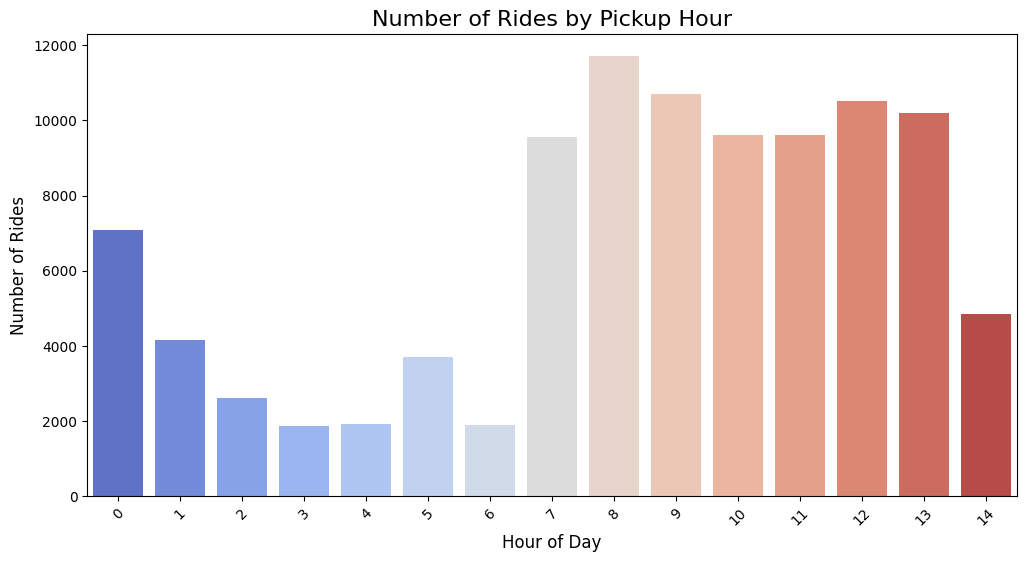

In [5]:
# ---------------------------------------
# Peak Time Analysis
# ---------------------------------------

# Peak Hour Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_hour', data=uber_data, palette='coolwarm')
plt.title('Number of Rides by Pickup Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Peak Day of the Week Analysis

<ipython-input-6-5a4847277f97>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_weekday', data=uber_data, palette='coolwarm', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


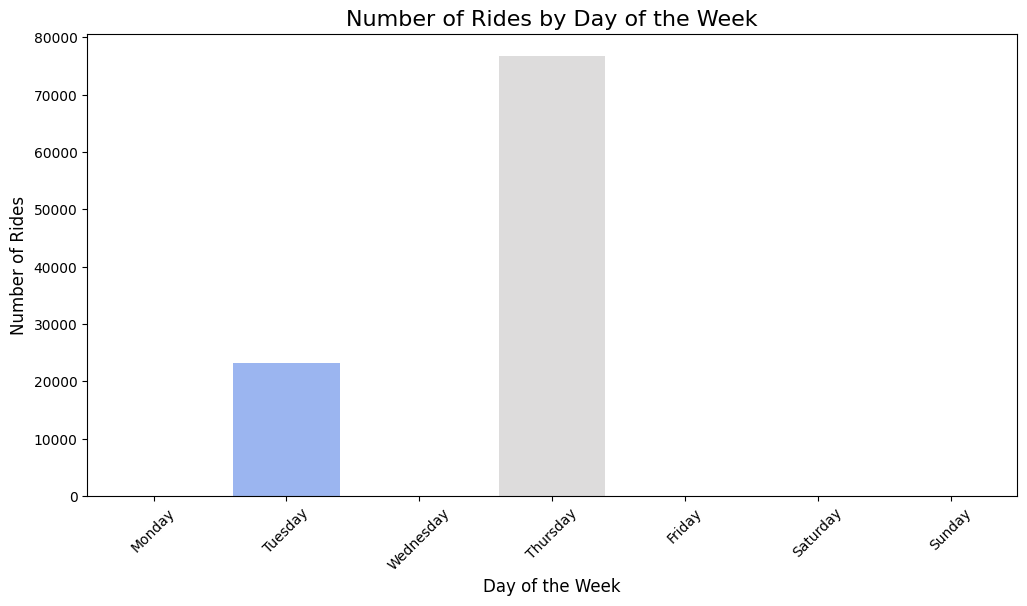

In [6]:
# Peak Day of the Week Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_weekday', data=uber_data, palette='coolwarm', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Rides by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Location Analysis

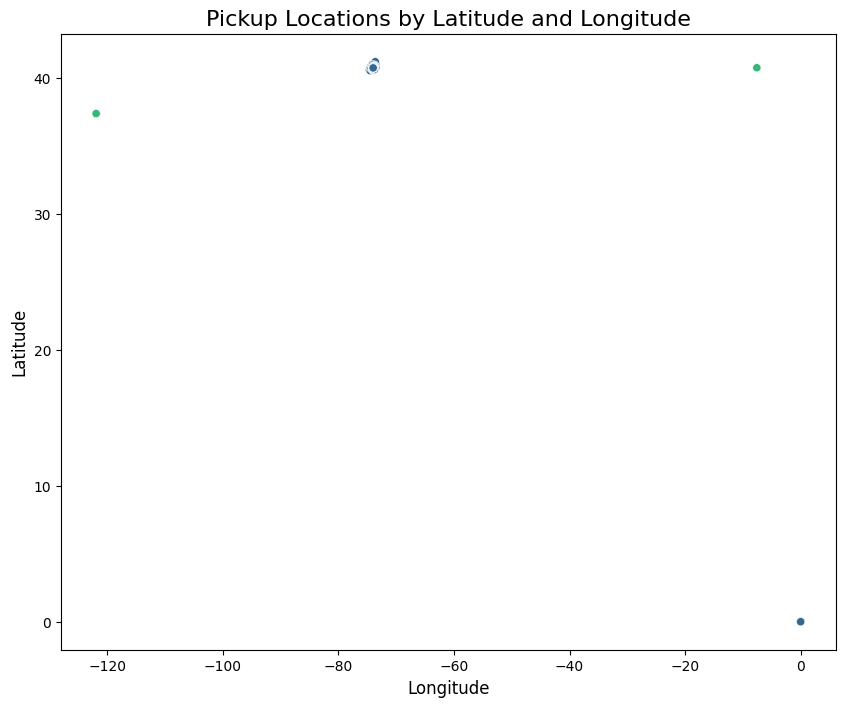

In [7]:
# ---------------------------------------
# Location Analysis
# ---------------------------------------

# Plotting pickup locations based on latitude and longitude
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=uber_data, hue='pickup_weekday', palette='viridis', legend=False)
plt.title('Pickup Locations by Latitude and Longitude', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

# Plotting dropoff locations based on latitude and longitude

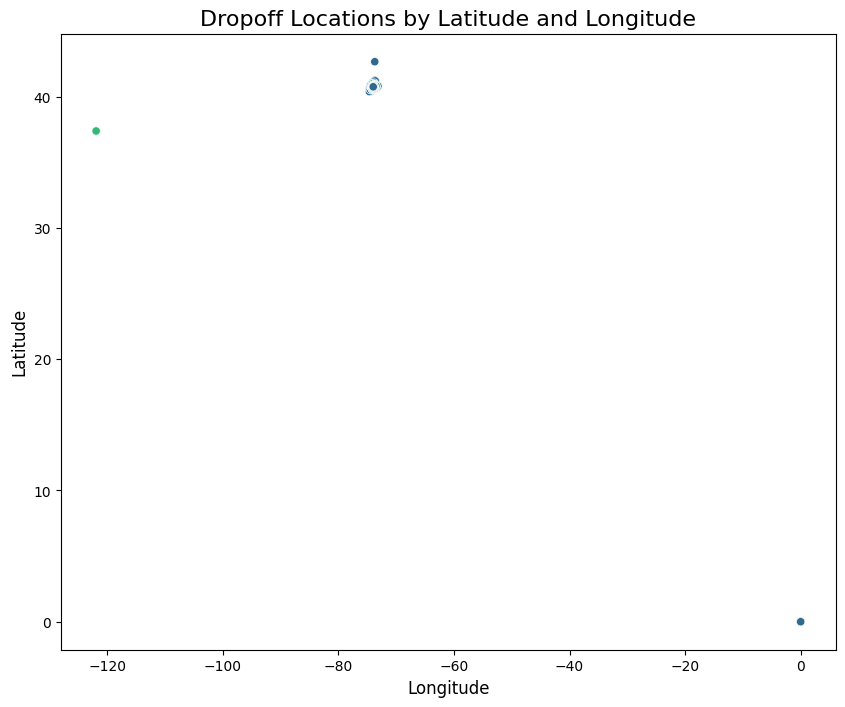

In [8]:
# Plotting dropoff locations based on latitude and longitude
plt.figure(figsize=(10, 8))
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', data=uber_data, hue='pickup_weekday', palette='viridis', legend=False)
plt.title('Dropoff Locations by Latitude and Longitude', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

# Fare and Distance Analysis

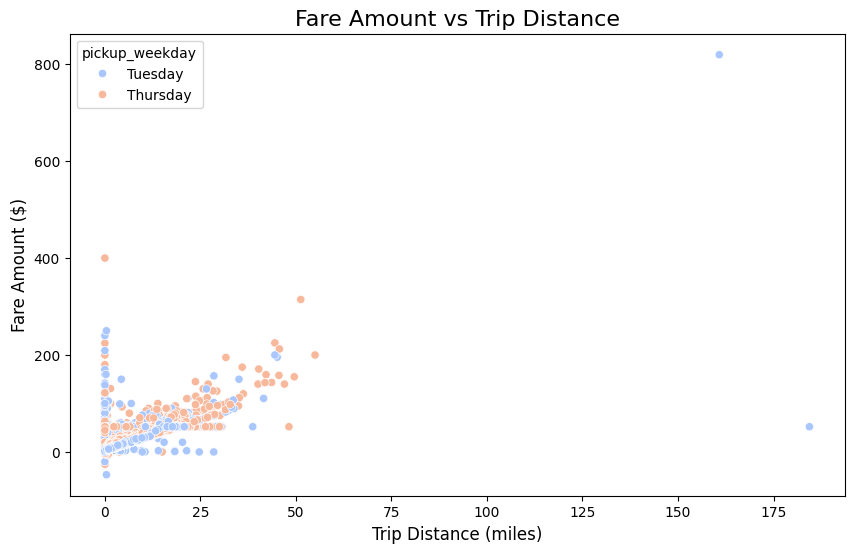

In [9]:
# ---------------------------------------
# Fare and Distance Analysis
# ---------------------------------------

# Plotting the relationship between trip distance and fare amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=uber_data, hue='pickup_weekday', palette='coolwarm')
plt.title('Fare Amount vs Trip Distance', fontsize=16)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.show()

# Display basic statistics about the fare and distance

In [10]:
# Display basic statistics about the fare and distance
print("Basic Statistics for Fare Amount and Trip Distance:")
print(uber_data[['fare_amount', 'trip_distance']].describe())

Basic Statistics for Fare Amount and Trip Distance:
         fare_amount  trip_distance
count  100000.000000  100000.000000
mean       13.252608       3.034270
std        11.685574       3.846951
min       -47.000000       0.000000
25%         6.500000       0.990000
50%         9.500000       1.670000
75%        15.000000       3.200000
max       819.500000     184.400000


# Fare by Hour

<ipython-input-11-846b89d1c60c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pickup_hour', y='fare_amount', data=uber_data, palette='coolwarm')


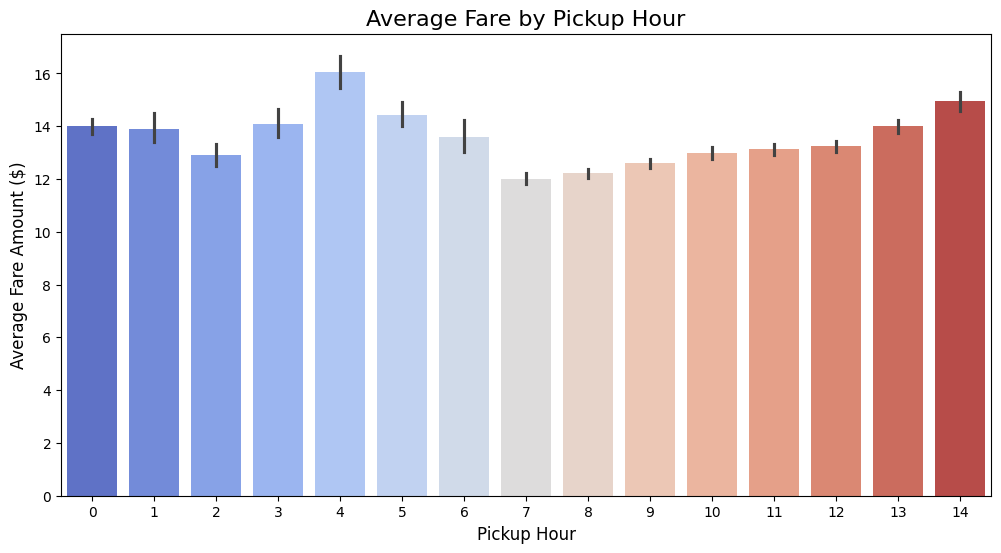

In [11]:
# Fare by Hour
plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_hour', y='fare_amount', data=uber_data, palette='coolwarm')
plt.title('Average Fare by Pickup Hour', fontsize=16)
plt.xlabel('Pickup Hour', fontsize=12)
plt.ylabel('Average Fare Amount ($)', fontsize=12)
plt.show()


# ---------------------------------------
# Conclusion
# ---------------------------------------
# The above code performs the following key analyses:
# 1. Peak time analysis reveals the busiest hours and days for Uber rides.
# 2. Location analysis identifies common pickup and dropoff areas using latitude and longitude data.
# 3. Fare vs. distance analysis explores the relationship between trip distance and fare, with peak hours showing how fares vary by time of day.